<a href="https://colab.research.google.com/github/williamokomba/AICE-Artificial-Intelligence-Diploma/blob/main/EDA_Revision_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

In [ ]:
#libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#create list
list1 = [1, 3, 5, 7, 9]
list2 = [2, 4, 6, 8, 10]

In [ ]:
#check the data type
type(list1)

list

In [ ]:
#convert list to a series
ser1 = pd.Series(list1)
ser2 = pd.Series(list2)

In [ ]:
#check data type
type(ser1)

pandas.core.series.Series

In [ ]:
df = pd.DataFrame({'A': ser1, 'B': ser2}) #carl braces
df

,A,B
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10


In [ ]:
#checking the datasets available in seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
#loading dataset using url
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv',delimiter=",", encoding='UTF-8')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#load dataset from seaborn
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


obseravtion: the dataset values are uniform

In [ ]:
#checking the shape
df.shape

(244, 7)

In [ ]:
#check data type using dtypes
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [ ]:
#check data type using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Columns: 7 entries, total_bill to size
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
#concise stat
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [ ]:
#check unique values
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [ ]:
#check columns
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
#check the column data type
type(df)

pandas.core.frame.DataFrame

In [ ]:
#check column data type
type(df['total_bill'])

pandas.core.series.Series

## Data cleaning

In [ ]:
#check null values
df.isnull().sum()# df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
#check for duplicates
df.duplicated().sum()

1

In [ ]:
#removing duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<Axes: >

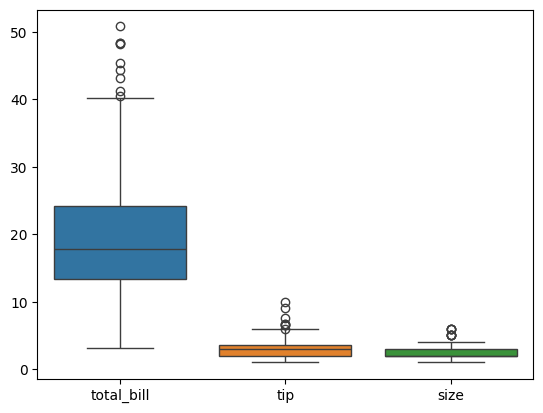

In [ ]:
#checking outliers
sns.boxplot(df)

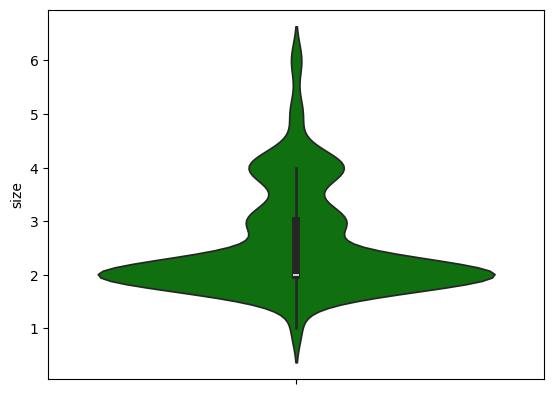

In [ ]:
sns.violinplot(df['size'], color='g');


## feature engineering

In [ ]:
#feature engineering
df['total_expense'] = df['total_bill'] + df['tip']
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_expense
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20


In [ ]:
#getting tax column
df['tax'] = df['total_bill'] * 0.1
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_expense,tax
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00,1.699
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00,1.034
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51,2.101
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99,2.368
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20,2.459


In [ ]:
#create copy for EDA
df1 = df.copy(deep=True)
df1.head()

,total_bill,tip,sex,smoker,day,time,size,total_expense,tax
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00,1.699
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00,1.034
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51,2.101
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99,2.368
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20,2.459


EDA

### 1. Univeriate analysis

we're analysing one variable ata atime

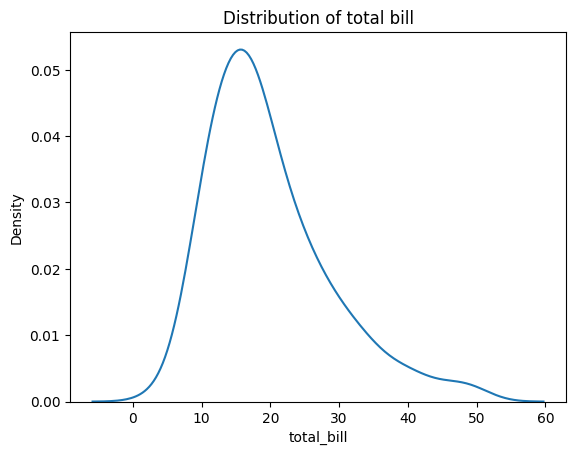

In [ ]:
#check distribution of the total bill variabe
sns.kdeplot(df1['total_bill'])
plt.title('Distribution of total bill')
plt.show()

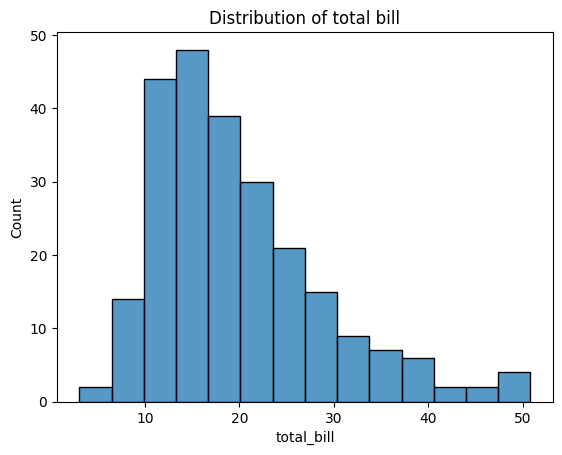

In [ ]:
#check distribution of the variabe
sns.histplot(df1['total_bill'])
plt.title('Distribution of total bill')
plt.show()

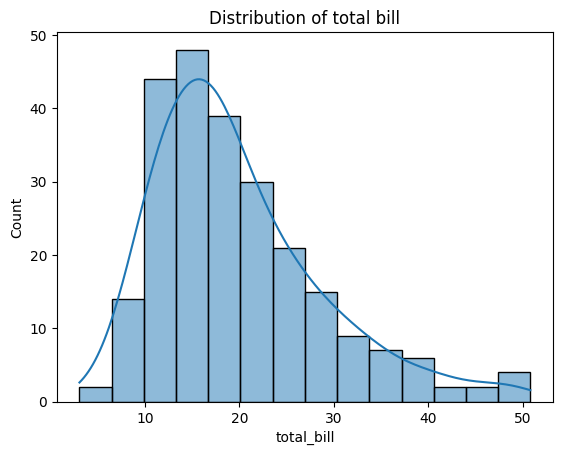

In [ ]:
#check distribution of the variabe
sns.histplot(df1['total_bill'], kde=True)
plt.title('Distribution of total bill')
plt.show()

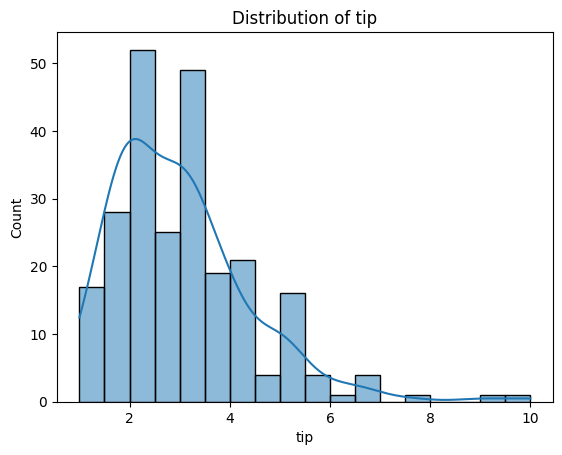

In [ ]:
#check distribution of the tip variabe
sns.histplot(df1['tip'], kde=True)
plt.title('Distribution of tip')
plt.show()

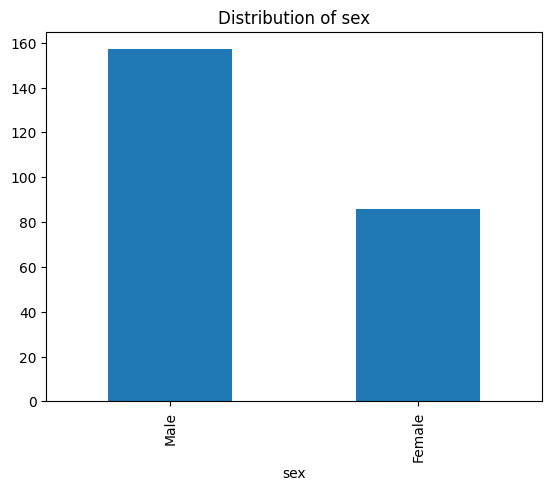

In [ ]:
#plotting the sex variable using matplotlib
sex_count = df['sex'].value_counts()
sex_count.plot(kind='bar')
plt.title('Distribution of sex')
plt.show()

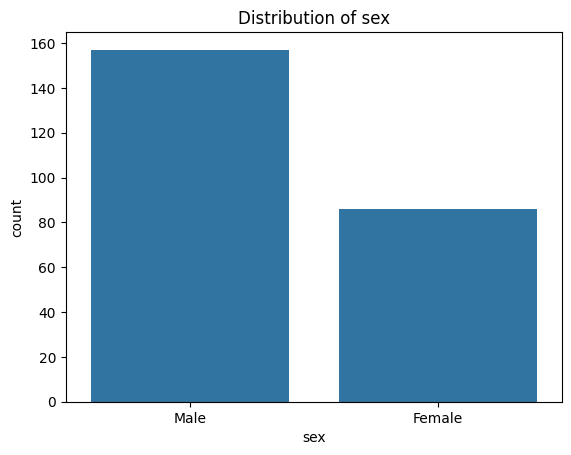

In [ ]:
#plotting the sex variable using seaborn
sex_count = df['sex'].value_counts()
sns.barplot(sex_count)
plt.title('Distribution of sex')
plt.show()

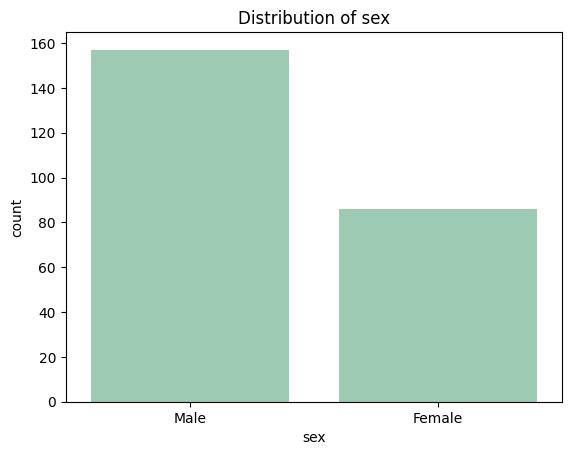

In [ ]:
#plotting the sex variable using seaborn countplot
sns.countplot(x = df['sex'], color='#95D2B3')
plt.title('Distribution of sex')
plt.show()

### 2. Bivariate analysis

here we check for the r/ship btn 2 variables

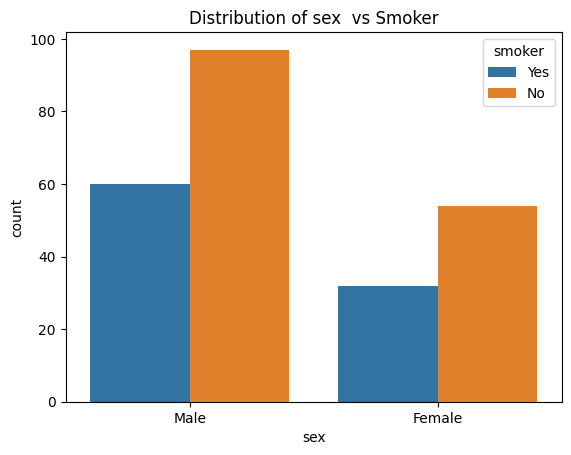

In [ ]:
#bivariate btn sex and smoker using seaborn
sns.countplot(x = df['sex'], hue = df['smoker'])
plt.title('Distribution of sex  vs Smoker')
plt.show()

In [ ]:
#create crosstab
cort = pd.crosstab(df['sex'], df['smoker'])
cort

smoker,Yes,No
sex,,
Male,60,97
Female,32,54


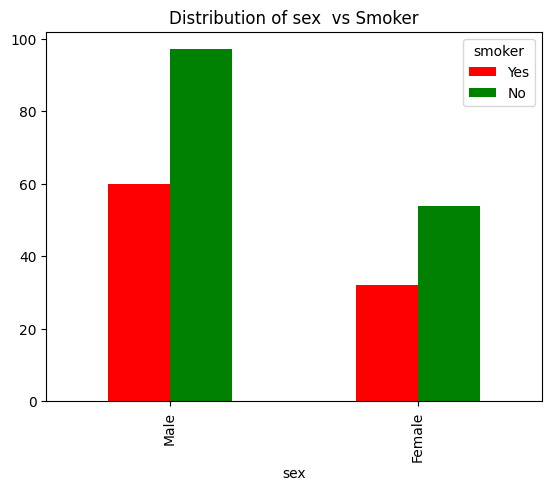

In [ ]:
#r/ship btn sex and smoker using matplotlib
cort.plot(kind='bar',color=['r','g'])
plt.title('Distribution of sex  vs Smoker')
plt.show()

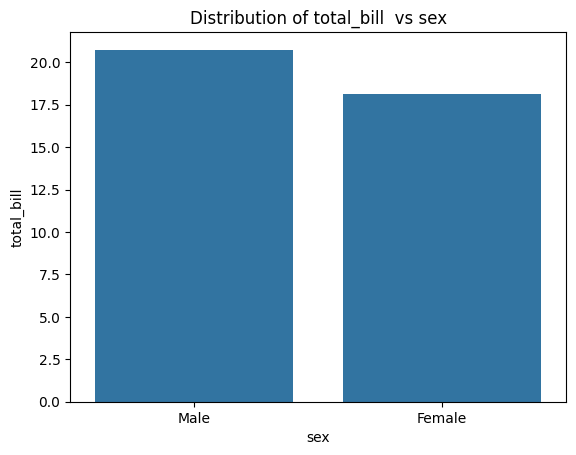

In [ ]:
#relationship beyween total_bill vs sex using seaborn
sns.barplot(x = df['sex'], y = df['total_bill'], errorbar=None)
plt.title('Distribution of total_bill  vs sex')
plt.show()

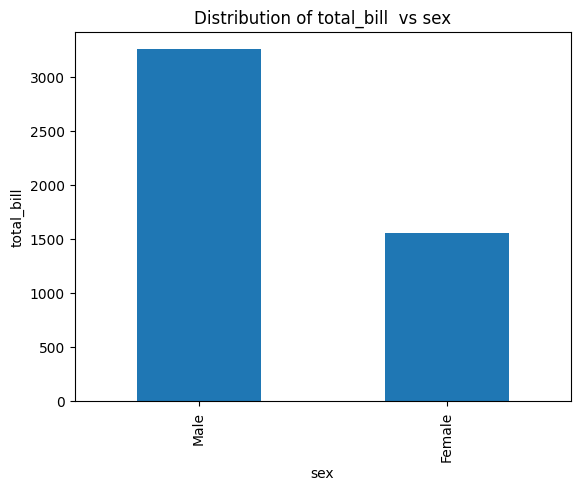

In [ ]:
#relationship beyween total_bill vs sex using matplotlib
total_gpr = df.groupby('sex')['total_bill'].sum()

total_gpr.plot(kind='bar')
plt.title('Distribution of total_bill  vs sex')
plt.ylabel('total_bill')
plt.show()

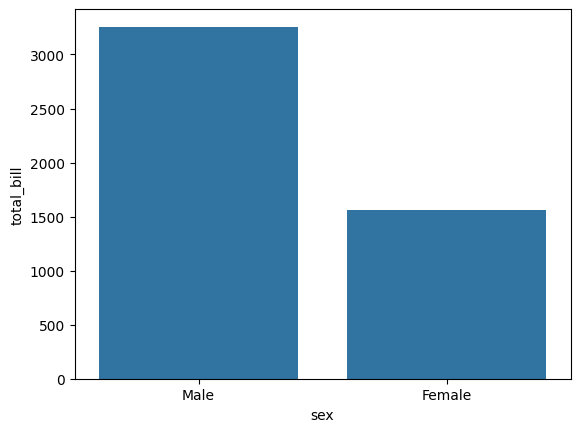

In [ ]:
# using seaborn with groupby result> gives better visual
sns.barplot(total_gpr);

#### bivariate for 2 numerical variables

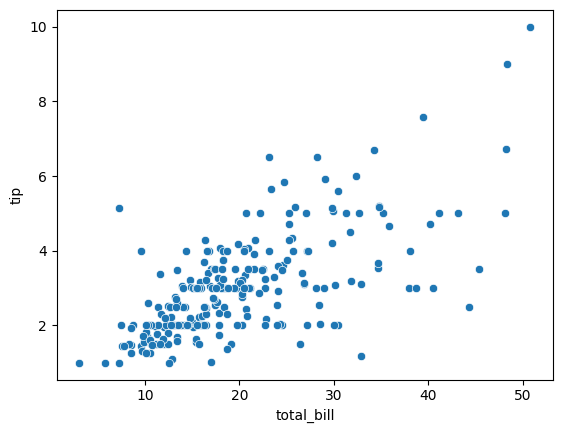

In [ ]:
#r/ship between total_bill and tip
sns.scatterplot(x='total_bill', y='tip', data=df1);

## Multivariate analysis

we look at r/ship among the 3 variables

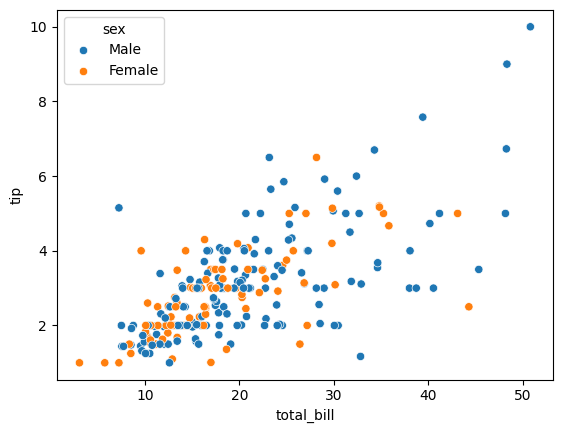

In [ ]:
#r/ship between tatal bill, tip , and sex
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df1);

In [ ]:
#using grpby method to plot the above
grp2 = df1.groupby(['sex'])[['total_bill', 'tip']].sum()

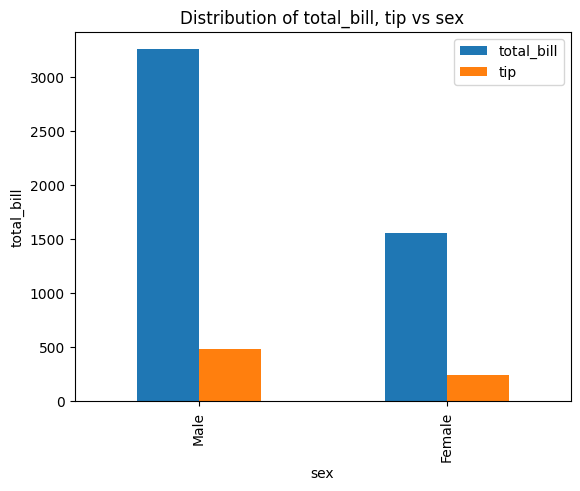

In [ ]:
##r/ship between tatal bill, tip , and sex using matplotlib bar chart
grp2.plot(kind='bar')
plt.title('Distribution of total_bill, tip vs sex')
plt.ylabel('total_bill')
plt.show()

## Assignment

Use the mpg dataset from seaborn to try all that we have done


In [ ]:
#load Dataset
data1 = sns.load_dataset('mpg')

#continue from here